In [1]:
using PyCall
using Pkg

In [2]:
# Here I import all required libraries

np = pyimport("numpy")
math = pyimport("math")
using NBInclude
Pkg.add("PyPlot")
@nbinclude("Functions.ipynb")

   Resolving package versions...
  No Changes to `C:\Users\hamad\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\hamad\.julia\environments\v1.9\Manifest.toml`


ReturnObjectiveValue (generic function with 1 method)

In [3]:
# Key Parameters
N = 20
AV_number = 4 # 0 or 1 or 2 or 4

platoon_bool = 1 # 0 or 1

# Position of the perturbation
brakeID = 4

4

In [4]:
# Parameters
if AV_number == 0
    mix = 0
    ActuationTime = 9999
else
    mix = 1
end

ID = zeros(N) #0. Manually Driven  1. Controller

if mix == 1
    ActuationTime = 0
    ID = getAVID(ID, AV_number, platoon_bool)
end


20-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 1.0
 1.0
 1.0
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [5]:
#Controller Parameter
gammaType = 2

v_star = 15

15

In [6]:
# OVM parameter
s_star = 20
v_max  = 30
s_st   = 5
s_go   = 35

#'''%%%%% Type1 %%%%%%%'''
alpha  = 0.6
beta   = 0.9

#'''%%%%%%%%% Type2 %%%%%%%%%'''
#     alpha  = 1.0
#     beta   = 1.5




0.9

In [7]:
#'''Other Parameters'''

acel_max = 2
dcel_max = -5

#'''%Driver Model: OVM'''

#'''% safe distance for collision avoidance'''
sd = 8 # minimum value is zero since the vehicle length is ignored

8

In [8]:
#Simulation
TotalTime = 100
Tstep = 0.001
NumStep = Int(TotalTime/Tstep)
#Scenario
Circumference = s_star*N


#Initial State for each vehicle
S = zeros(NumStep,N,3) #np.zeros((NumStep,N,3))
dev_s = 0
dev_v = 0
co_v = 1.0
v_ini = co_v * v_star #Initial velocity
print(NumStep)

100000

In [9]:
#from -dev to dev
using LinearAlgebra
using Random
var1 = LinRange(Circumference, s_star, N)
var2 = rand(Float64, N)*2*dev_s.- dev_s   
S[1, :, 1] = var1 + var2
var1 = v_ini*ones(N)
var2 = rand(Float64, N)*2*dev_v.-dev_v    
S[1, :, 2] =  var1 + var2

20-element Vector{Float64}:
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0

In [10]:
#Velocity Difference
V_diff = zeros(NumStep,N)
#Following Distance
D_diff = zeros(NumStep,N)
temp = zeros(N)
#Avg Speed
V_avg = zeros(NumStep,1)

X = zeros(2*N,NumStep)



40×100000 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0

In [11]:
##Controller

alpha1 = alpha*v_max/2* math.pi /(s_go-s_st)* math.sin(math.pi*(s_star-s_st)/(s_go-s_st))
alpha2 = alpha+beta
alpha3 = beta

# In[apply f]

if mix > 0
    Obj,stable_bool,stability_condition_bool,K = ReturnObjectiveValue(ID,N,alpha1,alpha2,alpha3,gammaType)
end

Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 2507            
  Affine conic cons.     : 3 (2630 rows)
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 1937            
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 780
Eliminator terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 2                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.03            
Lin. dep.  - primal attempts        : 1                 successes     

(+ (affine; real)
├─ 2.55804
└─ sum (affine; real)
   └─ diag (affine; real)
      └─ * (affine; real)
         ├─ …
         └─ …, false, false, * (affine; real)
├─ index (affine; real)
│  └─ 44×44 real variable (id: 219…399)
└─ 40×40 Matrix{Float64})

In [12]:
counter_tx = 0
counter_flag = 0

for k in 1:NumStep-2
    
    #Car in front velocity
    temp[2:end] = S[k,begin:end-1,2]
    temp[1] = S[k,end,2]
    V_diff[k,begin:end] = temp-S[k,begin:end,2]
    
    temp[1]=S[k,end,1]+ Circumference
    temp[2:end] = S[k,begin:end-1,1]
    
    D_diff[k,begin:end] = temp-S[k,begin:end,1]
   
    cal_D = D_diff[k,begin:end]
    
    ## might be different 
    cal_D[cal_D .> s_go] .= s_go
    cal_D[cal_D .< s_st] .= s_st
    
    acel2 = math.pi .*(cal_D.-s_st)./(s_go-s_st)
    acel1 = 1 .- cos.(acel2) 
    acel3 = zeros(N)
    
    acel = alpha*(v_max / 2 * acel1 .- S[k,begin:end,2]) + beta.* V_diff[k,begin:end] + acel3 #equation #1
    acel[acel .> acel_max] .= acel_max
    acel[acel .< dcel_max] .= dcel_max
    
    
    #SD as ADAS to prevent crash
    temp[2:end] = S[k,begin:end-1,2]
    temp[1] = S[k,end,2]
    acel_sd = (S[k,begin:end,2].^2 - temp .^ 2)./2 ./(D_diff[k,begin:end].-sd) #equation #2
    
    acel[acel_sd .> abs(dcel_max)] .= dcel_max
    
    S[k,begin:end,3] = acel
    
    if mix == 1
        
        AV_position = findall(!iszero, ==(1).(ID))
        
        if (k-1) > ActuationTime/Tstep
            
            X[1:2:39,k] = D_diff[k,begin:end].-s_star
            
            X[2:2:40,k] = S[k,begin:end,2].-v_star
            
            u = *(.-evaluate(K),X[begin:end, k])

            for i_AV in 1:AV_number
                id_AV = AV_position[i_AV]
                flag = (S[k,id_AV,2]^2 - S[k,id_AV-1,2]^2) / 2 / (S[k,id_AV-1,1]-S[k,id_AV,1]-sd) > abs(dcel_max)
                if any(flag)
                    u[i_AV] = dcel_max
                    counter_flag += 1
                end
                S[k,id_AV,3] = u[i_AV]
                
        end
        end
    end
    
    if (((k-1)*Tstep>20) && ((k-1)*Tstep<22))
        S[k,brakeID-1,3]=-5
    end
    
    S[k+1,begin:end,2] = S[k,begin:end,2] + Tstep*S[k,begin:end,3]
    S[k+1,begin:end,1] = S[k,begin:end,1] + Tstep*S[k,begin:end,2]
    end
#end


In [13]:
using StatsBase
for k in 1:NumStep
    V_avg[k] = mean(S[k,begin:end,2])
end
print("\ntest: ",V_avg[19],"\n")


test: 15.0


In [14]:
#Plot
Lwidth = 1.2
Wsize = 20

# In[7] 
# Velocity

#Settling Time
final_velocity = V_avg[NumStep-3]
above_1_percent = final_velocity*1.03
below_1_percent = final_velocity*0.97

settling_time = 0
for k in range(start = NumStep - 1, stop = 1, step = -1)
    for j in 1:N
        if (S[k,j,2] > above_1_percent) || (S[k,j,2] < below_1_percent)
            settling_time = (k-1)/100
            break
        end
    end
    if settling_time != 0
        break
    end
        
end
print("Settling Time within 3% is ",settling_time, "s")

Settling Time within 3% is 449.44s

In [15]:
#Maximum Spacing in fron of AV
max_space = 0
for k in 1:NumStep
    curr_space = S[k,end-1,1]-S[k,end,1]
    if (curr_space > max_space)
        max_space = curr_space
    end
end

print("Maximum Spacing in front of AV is ", round(max_space,digits = 2) )

#Average settled velocity
print("\nAverage settled velocity is ", mean(S[90000:end,begin:end,2]), " m/s")


spacing_or_velocity = 1 # 0 or 1 

Maximum Spacing in front of AV is 20.01
Average settled velocity is 14.998500149782485 m/s

1

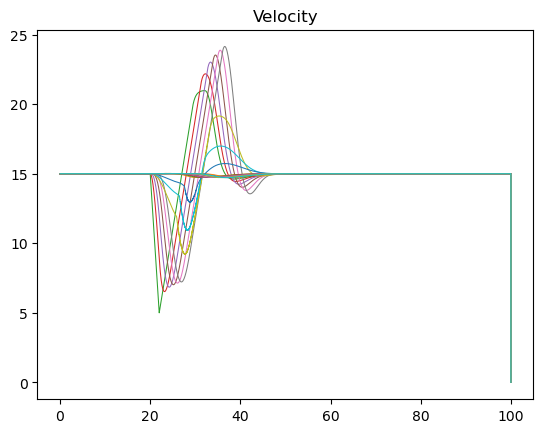

PyObject Text(0.5, 1.0, 'Velocity')

In [16]:
using PyPlot
xAxis = LinRange(0, 100, 100000)
plot(xAxis,S[:,:,2],linewidth=0.75)
title("Velocity")

sys:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


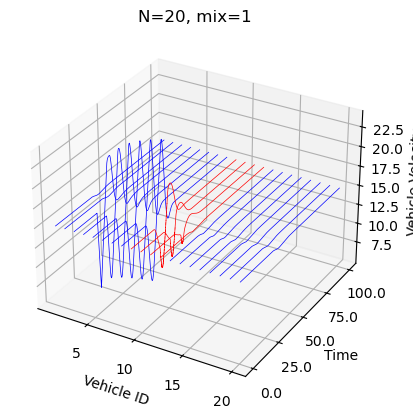

In [17]:
#Display Data:
fig = figure()
x = 1:NumStep
yticks = LinRange(0,NumStep,5)
yticklabels = LinRange(0,TotalTime,5)

# syntax for 3-D projection

if spacing_or_velocity == 0
    ax = PyPlot.axes(projection = "3d")
    for i = 1:N
        z = ones(Numstep-1)*i

        if ID[i] == 1
            ax.plot3D(z, x[begin:end-1], S[begin:end-1,i - 1, 1] - S[begin:end-1, i, 1],  "red", linewidth = 0.5)
            continue
        end
        
        if i == 1
            ax.plot3D(z, x[begin:end-1], S[begin:end-1,i-1,1] - S[begin:end-1,i,1] + Circumference, "blue", linewidth=0.5)
            continue
        end

        ax.plot3D(z, x[begin:end-1], S[begin:end-1,i-1,1] - S[begin:end-1,i,1], "blue", linewidth=0.5)
            
    end
    
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabels)
    ax.set_xlabel("Vehicle ID")
    ax.set_ylabel("Time")
    ax.set_zlabel("Spacing from vehicle ahead")
    PlotTitle = join(["N=", string(N), ", mix=", string(mix) ])
    ax.set_title(PlotTitle)
    show()
end

if spacing_or_velocity == 1
    ax = PyPlot.axes(projection = "3d")
    for i = 1:N
        z = ones(NumStep-1)*i

        # if i==N-1 and mix==1:
        if ID[i] == 1
            ax.plot3D(z, x[begin:end-1], S[begin:end-1,i,2], "red", linewidth=0.5)
            continue
        end
        
        ax.plot3D(z, x[begin:end-1], S[begin:end-1,i,2], "blue", linewidth=0.5)

    end
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabels)
    ax.set_xlabel("Vehicle ID")
    ax.set_ylabel("Time")
    ax.set_zlabel("Vehicle Velocity")
    PlotTitle = join(["N=", string(N), ", mix=", string(mix) ]) # "N="# + str(N) + ", mix=" + str(mix) 
    ax.set_title(PlotTitle)
    show()
end